#libraries and dataset calling through API

In [ ]:
!pip install -q kaggle

!kaggle datasets download -d muhammadardiputra/potato-leaf-disease-dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-leaf-disease-dataset.zip', 'r')
zip_ref.extractall('/content')


In [15]:
!pip install -q colorama
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import colorama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from  tensorflow.keras import models,layers
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


#CNN

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=25
df=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [5]:
class_names=df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(df)

36

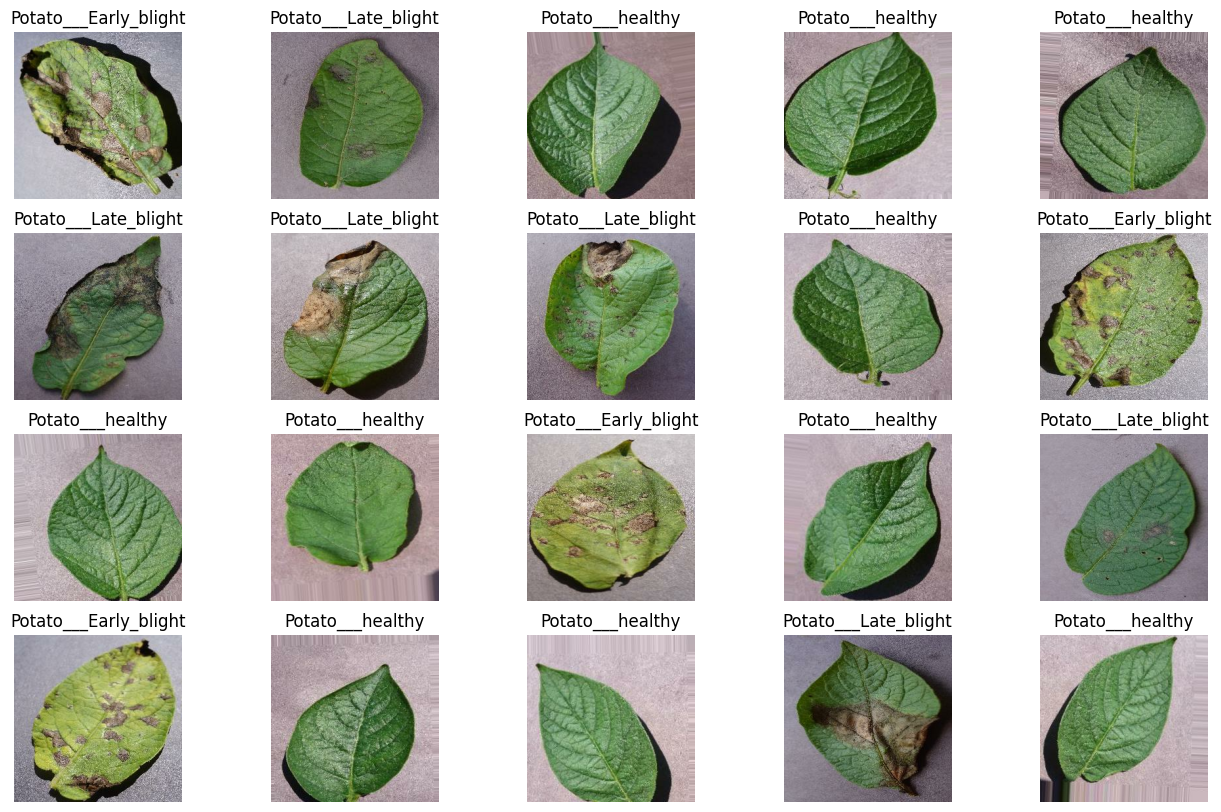

In [7]:
plt.figure(figsize=(16,10))
for image_batch,labels_batch in df.take(1):
    for i in range(20):
        ax=plt.subplot(4,5,i+1)

        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

In [8]:
test=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Test',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [9]:
valid=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Potato/Valid',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [10]:
from tensorflow.keras.models import Sequential
cnn=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128)

])

In [11]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=cnn.fit(df,
          validation_data=valid,
          epochs=25,
          batch_size=32,
          verbose=1)

In [ ]:
epochs_range=range(25)


plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')



In [ ]:

plt.plot(epochs_range,history.history['loss'],label='Training los')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [ ]:
#img='/content/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg'
#img='/content/Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG'
img="/content/Potato/Test/Potato___Late_blight/09287918-9f73-4707-823f-f4331f5114a3___RS_LB 2604.JPG"
path=img
img=tf.keras.utils.load_img(img,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(img)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:

def image_name(path:str)->str:
    k=str()
    count=0

    l=len(path)
    for n,i in enumerate(path):
        if(i=='/'):
            count+=1
        if(count==4):
            if(i=='/'):
                pass
            else:
                k=k+i
    return k


In [ ]:
predict=cnn.predict(img_bat)


In [ ]:
score=tf.nn.softmax(predict)


In [ ]:
print(colorama.Fore.GREEN+"Original Iamage "+image_name(path))
plt.imshow(img)
plt.title(class_names[np.argmax(score)])
plt.axis('off')


In [ ]:
print("leaf in images if {} with accuracy of {:0.2f}".format(class_names[np.argmax(score)],np.max(score)*100))

In [ ]:
cnn.save('PotatoDiseaseClassification.keras')

#Creating Dataset

In [16]:
import glob
import pandas as pd
import numpy as np


from PIL import Image
early=glob.glob("/content/Potato/Train/Potato___Early_blight/*")
ealrly_df=pd.DataFrame(np.asarray(Image.open(early[0])).flatten())
for i in range(1,len(early)):
    ealrly_df[i]=pd.DataFrame(np.asarray(Image.open(early[i])).flatten())




early_df=ealrly_df.transpose()

early_df['status']=early_df['status']="Potato_Early_blight"
early_df

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
0,177,172,178,162,157,163,167,162,168,167,...,153,150,167,148,145,162,141,138,155,Potato_Early_blight
1,206,204,209,203,201,206,199,197,202,196,...,138,132,144,138,132,144,148,142,154,Potato_Early_blight
2,142,138,152,187,183,197,106,102,116,118,...,182,179,186,184,181,188,183,180,187,Potato_Early_blight
3,162,159,170,158,155,166,158,155,166,160,...,135,134,152,138,137,155,141,140,158,Potato_Early_blight
4,192,187,194,190,185,192,193,188,195,197,...,141,138,145,150,147,154,132,129,136,Potato_Early_blight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,166,167,185,167,168,186,172,173,191,179,...,117,112,132,119,114,134,107,102,122,Potato_Early_blight
296,179,172,179,155,148,155,148,141,148,153,...,167,164,175,156,153,164,173,170,181,Potato_Early_blight
297,127,123,138,120,116,131,131,127,142,116,...,182,184,197,182,184,197,178,180,193,Potato_Early_blight
298,172,169,176,183,180,187,193,190,197,194,...,129,123,125,132,126,128,137,131,133,Potato_Early_blight


In [17]:
late=glob.glob("/content/Potato/Train/Potato___Late_blight/*")
late_df=pd.DataFrame(np.asarray(Image.open(late[0])).flatten())
for i in range(1,len(late)):
    late_df[i]=pd.DataFrame(np.asarray(Image.open(late[i])).flatten())




late_df=late_df.transpose()

late_df['status']=late_df['status']="Potato_Late_blight"
late_df

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
0,160,149,153,152,141,145,148,137,141,153,...,145,134,138,154,143,147,144,133,137,Potato_Late_blight
1,169,162,169,170,163,170,169,162,169,166,...,112,99,108,114,101,110,115,102,111,Potato_Late_blight
2,87,80,96,94,87,103,98,91,107,95,...,155,147,160,154,146,159,154,146,159,Potato_Late_blight
3,93,89,106,86,82,99,81,77,94,82,...,147,146,164,147,146,164,149,148,166,Potato_Late_blight
4,165,158,165,159,152,159,164,157,164,170,...,114,102,106,127,115,119,119,107,111,Potato_Late_blight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,169,158,166,169,158,166,169,158,166,170,...,116,104,114,121,109,119,126,114,124,Potato_Late_blight
296,160,143,149,159,142,148,164,147,153,170,...,145,128,134,139,122,128,150,133,139,Potato_Late_blight
297,185,167,167,168,150,150,176,158,158,194,...,136,107,109,137,108,110,136,107,109,Potato_Late_blight
298,200,182,180,183,165,163,198,180,178,196,...,154,124,122,144,114,112,132,102,100,Potato_Late_blight


In [18]:
healthy=glob.glob("/content/Potato/Train/Potato___healthy/*")
healthy_df=pd.DataFrame(np.asarray(Image.open(healthy[0])).flatten())
for i in range(1,len(healthy)):
    healthy_df[i]=pd.DataFrame(np.asarray(Image.open(healthy[i])).flatten())




healthy_df=healthy_df.transpose()

healthy_df['status']=healthy_df['status']="Potato_healthy"



In [19]:

main=pd.concat([healthy_df,late_df,early_df])
main=main.sample(frac=1).reset_index().drop('index',axis=1)
main


,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
0,160,139,148,159,138,147,162,141,150,165,...,196,179,187,189,172,180,181,164,172,Potato_healthy
1,166,162,177,167,163,178,167,163,178,166,...,103,94,111,107,98,115,109,100,117,Potato_Late_blight
2,212,197,194,212,197,194,215,200,197,194,...,91,59,64,117,85,90,112,80,85,Potato_Late_blight
3,122,120,131,125,123,134,119,117,128,108,...,175,174,188,174,173,187,169,168,182,Potato_Early_blight
4,204,203,217,177,176,190,210,209,223,171,...,123,124,144,132,133,153,103,104,124,Potato_Early_blight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,152,139,149,150,137,147,149,136,146,150,...,156,143,153,166,153,163,143,130,140,Potato_Late_blight
896,192,187,194,190,185,192,193,188,195,197,...,141,138,145,150,147,154,132,129,136,Potato_Early_blight
897,154,153,169,154,153,169,155,154,170,154,...,150,148,161,142,140,153,150,148,161,Potato_Early_blight
898,96,91,98,104,99,106,111,106,112,110,...,180,177,184,178,175,182,176,173,180,Potato_Early_blight


<Axes: xlabel='status', ylabel='count'>

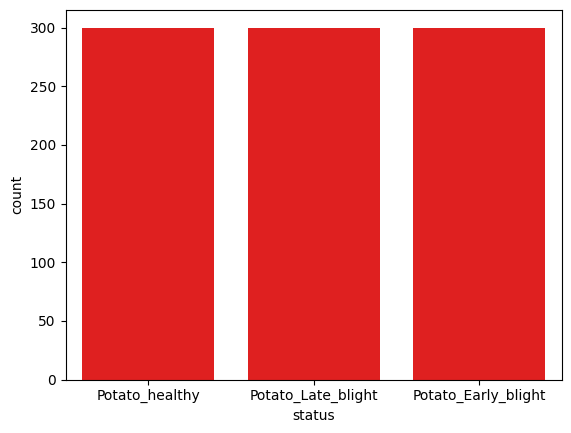

In [20]:
import seaborn as sns
sns.countplot(x=main['status'],color="red")

In [21]:
x=main.drop('status',axis=1)
y=main['status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# Machine Learning Algorithm Random Forest


In [22]:
#shuffle rows
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()


rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
pred=rf.predict(x_test)
print("Acuuracy Score",accuracy_score(pred,y_test))
print("Classification Report \n",classification_report(pred,y_test))
print("Confusion matrix \n",confusion_matrix(pred,y_test))

Acuuracy Score 0.8555555555555555
Classification Report 
                      precision    recall  f1-score   support

Potato_Early_blight       0.90      0.87      0.88        60
 Potato_Late_blight       0.80      0.85      0.83        61
     Potato_healthy       0.88      0.85      0.86        59

           accuracy                           0.86       180
          macro avg       0.86      0.86      0.86       180
       weighted avg       0.86      0.86      0.86       180

Confusion matrix 
 [[52  6  2]
 [ 4 52  5]
 [ 2  7 50]]


In [24]:
main.iloc[[95]]


,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
95,164,153,161,162,151,159,166,155,163,175,...,155,140,143,179,164,167,165,150,153,Potato_Late_blight


Original is  Potato_Late_blight


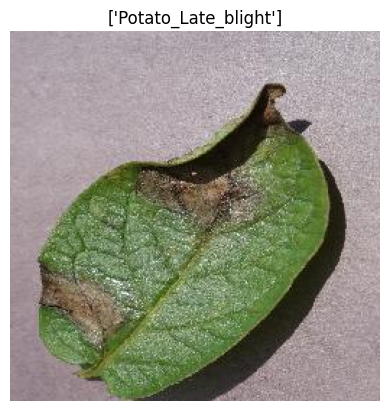

In [25]:
def predict_image(df,index):

    plt.imshow(np.int64(df.iloc[index].drop('status',axis=0).to_numpy().reshape(256,256,3)))
    print(colorama.Fore.MAGENTA+"Original is ",df.iloc[index].status)
    plt.title(rf.predict(df.iloc[[index]].drop('status',axis=1)))
    plt.axis("off")

predict_image(main,95)

#Logistic Reggresion

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
pred=lr.predict(x_test)
print("Acuuracy Score",accuracy_score(pred,y_test))
print("Classification Report \n",classification_report(pred,y_test))
print("Confusion matrix \n",confusion_matrix(pred,y_test))

Acuuracy Score 0.8055555555555556
Classification Report 
                      precision    recall  f1-score   support

Potato_Early_blight       0.79      0.90      0.84        51
 Potato_Late_blight       0.89      0.68      0.77        85
     Potato_healthy       0.72      0.93      0.81        44

           accuracy                           0.81       180
          macro avg       0.80      0.84      0.81       180
       weighted avg       0.82      0.81      0.80       180

Confusion matrix 
 [[46  4  1]
 [12 58 15]
 [ 0  3 41]]


In [28]:
main.iloc[[95]]


,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
95,164,153,161,162,151,159,166,155,163,175,...,155,140,143,179,164,167,165,150,153,Potato_Late_blight


In [29]:
lr.predict(x_test.iloc[[0]])

array(['Potato_Late_blight'], dtype=object)

Original is  Potato_Late_blight


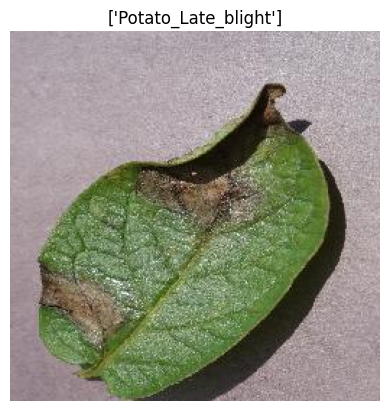

In [30]:
def predict_image(df,index):

    plt.imshow(np.int64(df.iloc[index].drop('status',axis=0).to_numpy().reshape(256,256,3)))
    print(colorama.Fore.MAGENTA+"Original is ",df.iloc[index].status)
    plt.title(lr.predict(df.iloc[[index]].drop('status',axis=1)))
    plt.axis("off")

predict_image(main,95)

#Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
pred=dt.predict(x_test)
print("Acuuracy Score",accuracy_score(pred,y_test))
print("Classification Report \n",classification_report(pred,y_test))
print("Confusion matrix \n",confusion_matrix(pred,y_test))

Acuuracy Score 0.6722222222222223
Classification Report 
                      precision    recall  f1-score   support

Potato_Early_blight       0.59      0.64      0.61        53
 Potato_Late_blight       0.77      0.67      0.71        75
     Potato_healthy       0.65      0.71      0.68        52

           accuracy                           0.67       180
          macro avg       0.67      0.67      0.67       180
       weighted avg       0.68      0.67      0.67       180

Confusion matrix 
 [[34 10  9]
 [14 50 11]
 [10  5 37]]


In [33]:
main.iloc[[95]]


,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
95,164,153,161,162,151,159,166,155,163,175,...,155,140,143,179,164,167,165,150,153,Potato_Late_blight


Original is  Potato_Late_blight


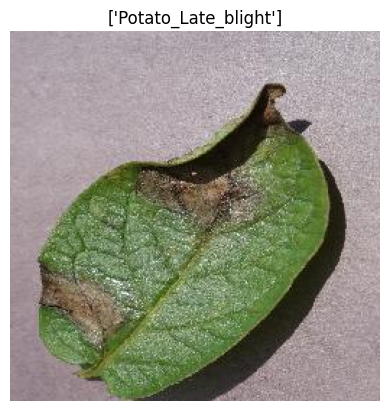

In [34]:
def predict_image(df,index):

    plt.imshow(np.int64(df.iloc[index].drop('status',axis=0).to_numpy().reshape(256,256,3)))
    print(colorama.Fore.MAGENTA+"Original is ",df.iloc[index].status)
    plt.title(dt.predict(df.iloc[[index]].drop('status',axis=1)))
    plt.axis("off")

predict_image(main,95)

#naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)


GaussianNB()

In [40]:
pred=naive.predict(x_test)
print("Acuuracy Score",accuracy_score(pred,y_test))
print("Classification Report \n",classification_report(pred,y_test))
print("Confusion matrix \n",confusion_matrix(pred,y_test))



Acuuracy Score 0.8166666666666667
Classification Report 
                      precision    recall  f1-score   support

Potato_Early_blight       0.91      0.87      0.89        61
 Potato_Late_blight       0.78      0.80      0.79        64
     Potato_healthy       0.75      0.78      0.77        55

           accuracy                           0.82       180
          macro avg       0.82      0.82      0.82       180
       weighted avg       0.82      0.82      0.82       180

Confusion matrix 
 [[53  4  4]
 [ 3 51 10]
 [ 2 10 43]]


In [41]:
main.iloc[[95]]



,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,status
95,164,153,161,162,151,159,166,155,163,175,...,155,140,143,179,164,167,165,150,153,Potato_Late_blight


Original is  Potato_Late_blight


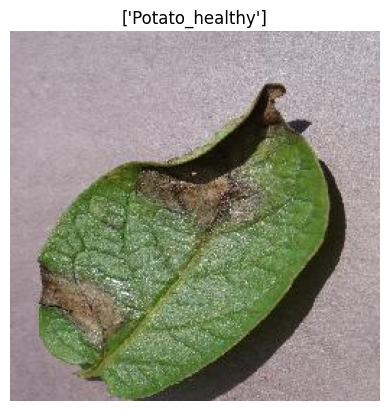

In [42]:

def predict_image(df,index):

    plt.imshow(np.int64(df.iloc[index].drop('status',axis=0).to_numpy().reshape(256,256,3)))
    print(colorama.Fore.MAGENTA+"Original is ",df.iloc[index].status)
    plt.title(naive.predict(df.iloc[[index]].drop('status',axis=1)))
    plt.axis("off")
 predict_image(main,95)

#pickling Model

In [43]:
import pickle
with open("dt_pkl","wb") as f:
    pickle.dump(dt,f)

with open("naive_pkl","wb") as f:
    pickle.dump(naive,f)

with open("rf_pkl","wb") as f:
    pickle.dump(rf,f)

with open("lr","wb") as f:
    pickle.dump(lr,f)